In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Monthly_Sales.csv")
df

,Rate,Sales_1st_Month,Sales_2nd_Month,Sales_3rd_Month
0,NaN,2,500,300
1,NaN,4,300,650
2,four,600,200,400
3,nine,450,320,650
4,seven,600,250,350
5,five,550,200,700


In [3]:
df.isnull().sum()

Rate               2
Sales_1st_Month    0
Sales_2nd_Month    0
Sales_3rd_Month    0
dtype: int64

In [4]:
df.columns

Index(['Rate ', 'Sales_1st_Month', 'Sales_2nd_Month', 'Sales_3rd_Month'], dtype='object')

In [5]:
df['Rate '].fillna("zero",inplace=True)

In [6]:
X = df.iloc[:, :3]
y = df.iloc[:, -1]

In [7]:
X

,Rate,Sales_1st_Month,Sales_2nd_Month
0,zero,2,500
1,zero,4,300
2,four,600,200
3,nine,450,320
4,seven,600,250
5,five,550,200


In [8]:
y

0    300
1    650
2    400
3    650
4    350
5    700
Name: Sales_3rd_Month, dtype: int64

In [11]:
def convert_to_int(word):
    word_dict = {
        "zero":0,
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "seven": 7,
        "eight": 8,
        "nine": 9,
        "ten": 10
    }

    return word_dict[word]

In [12]:
X['Rate ']=X['Rate '].apply(lambda x:convert_to_int(x))

In [13]:
X

,Rate,Sales_1st_Month,Sales_2nd_Month
0,0,2,500
1,0,4,300
2,4,600,200
3,9,450,320
4,7,600,250
5,5,550,200


In [14]:
df = pd.concat([X, y], axis=1)
df.head()

,Rate,Sales_1st_Month,Sales_2nd_Month,Sales_3rd_Month
0,0,2,500,300
1,0,4,300,650
2,4,600,200,400
3,9,450,320,650
4,7,600,250,350


In [20]:
from scipy import stats
df_cleaned = df[(np.abs(stats.zscore(df[['Sales_1st_Month', 'Sales_2nd_Month', 'Sales_3rd_Month']])) < 3).all(axis=1)]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_cleaned[['Rate ', 'Sales_1st_Month', 'Sales_2nd_Month']]
y = df_cleaned['Sales_3rd_Month']

X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression Model")
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression Model
R^2 Score: -15.149107112667608
Mean Absolute Error: 532.5769230769233
Root Mean Squared Error: 703.2541541473079


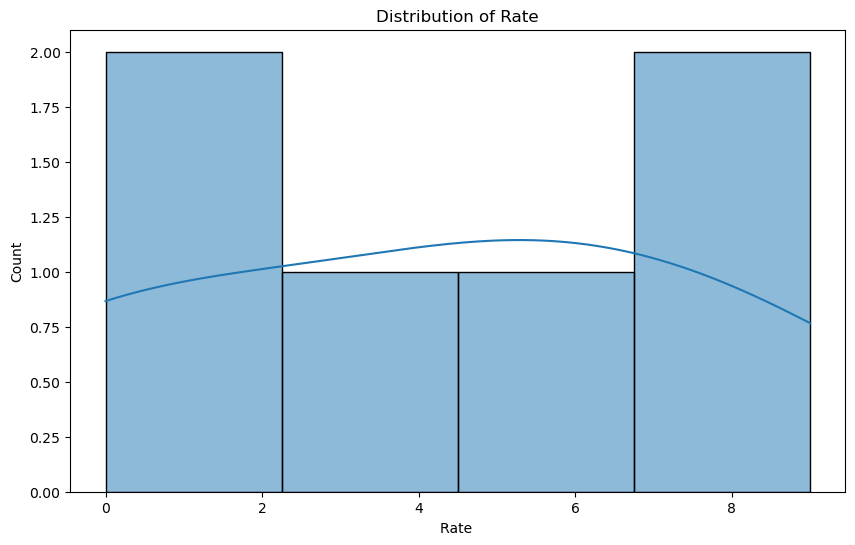

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rate '], kde=True)
plt.title('Distribution of Rate')
plt.show()

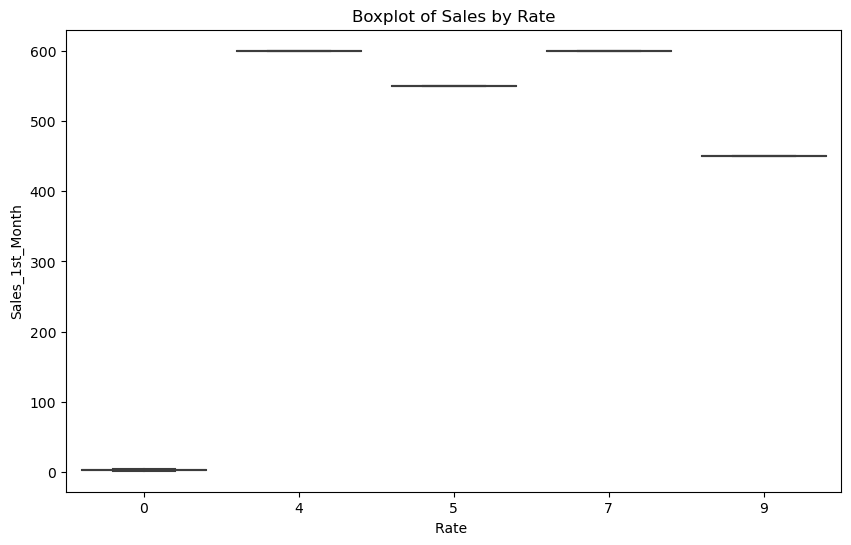

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rate ', y='Sales_1st_Month')
plt.title('Boxplot of Sales by Rate')
plt.show()

C:\Users\gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


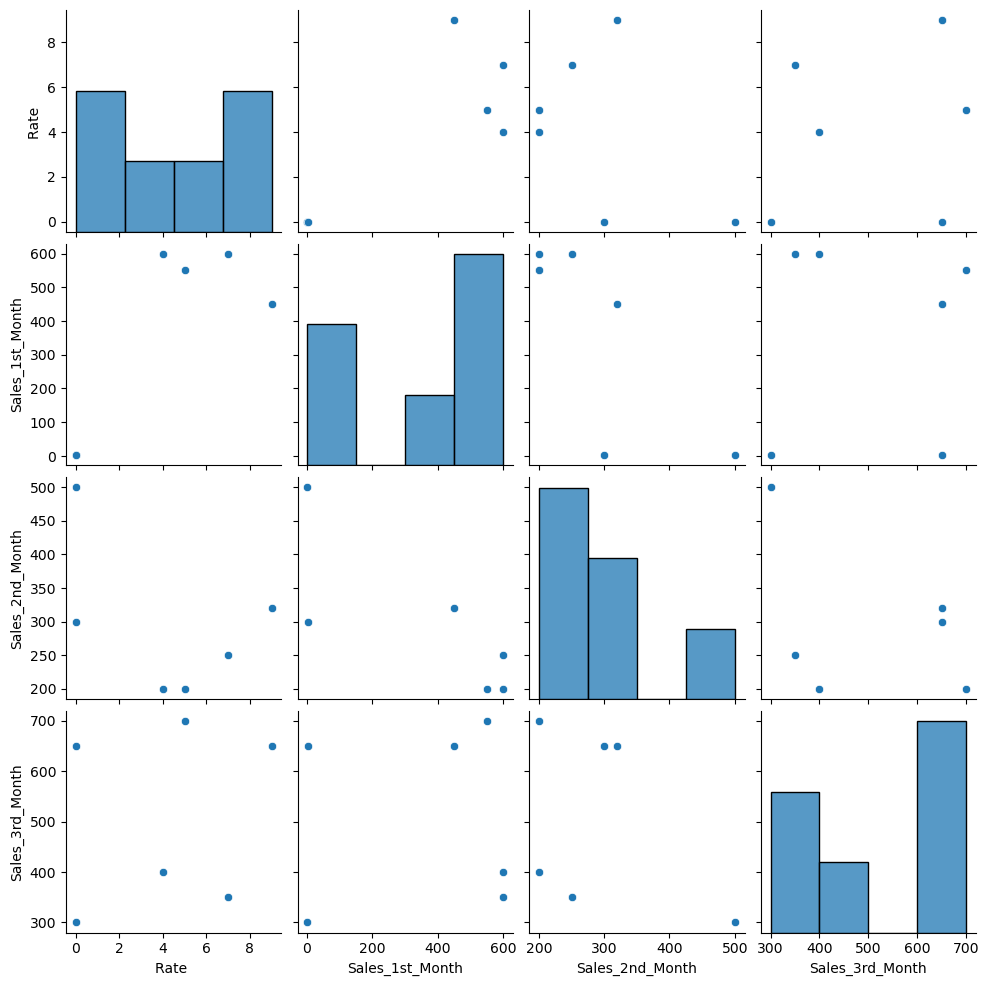

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
def predict_future_sales(rate, sales_1st_month, sales_2nd_month):
    rate_int = convert_to_int(rate)
    scaled_input = scaler.transform([[rate_int, sales_1st_month, sales_2nd_month]])
    future_sales_prediction = lr.predict(scaled_input)
    return future_sales_prediction[0]

future_sales = predict_future_sales("five", 550, 200)
print(f"Predicted Sales for the next month: {future_sales}")


Predicted Sales for the next month: 700.0000000000001


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
